Health Analytics Group Project

Data Cleaning, Feature Engineering & EDA

Dataset: https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset?select=heart_disease_health_indicators_BRFSS2015.csv

Data Dictionary: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy.stats
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.decomposition import PCA
import sklearn.model_selection as cv
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("final_data.csv")
df=pd.DataFrame(df)
df=df.drop("Unnamed: 0", axis=1)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [3]:
#df.info()

In [4]:
df.shape

(253680, 53)

In [5]:
#df.isnull().sum()

In [6]:
pd.crosstab(df['HeartDiseaseorAttack'], df['Male'])

Male,0,1
HeartDiseaseorAttack,,
0.0,98018,131769
1.0,13688,10205


#### Train test split

In [7]:
import sklearn.model_selection as cv
(train,test) = cv.train_test_split(df, test_size=.20)

In [8]:
#train

In [9]:
#test

In [10]:
x_train=train.drop("HeartDiseaseorAttack", axis=1)
y_train=train["HeartDiseaseorAttack"]

x_test=test.drop("HeartDiseaseorAttack", axis=1)

y_test=test["HeartDiseaseorAttack"]

#### LogisticRegression

In [26]:
#Build and train the logistic model
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
#create class predictions based on model
y_pred = model.predict(x_test)

In [13]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
#confusion matrix and Classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45502   552]
 [ 4063   619]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     46054
         1.0       0.53      0.13      0.21      4682

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



In [27]:
#Predicted probabilities based on model
y_pred_probs = model.predict_proba(x_test)

In [28]:
y_pred_probs.shape

(50736, 2)

In [29]:
y_pred_probs

array([[0.96351933, 0.03648067],
       [0.99210064, 0.00789936],
       [0.98296895, 0.01703105],
       ...,
       [0.96567655, 0.03432345],
       [0.53616609, 0.46383391],
       [0.99013432, 0.00986568]])

In [30]:
#Brier score using predcited probabilities
from sklearn.metrics import brier_score_loss
# How good the model predicts for heart disease cases
y_pred2 = y_pred_probs[:,1]
brier_score_loss(y_test, y_pred2)

0.06924213690200022

In [19]:
#ROC curve
!pip install scikit-plot
import scikitplot as skplt

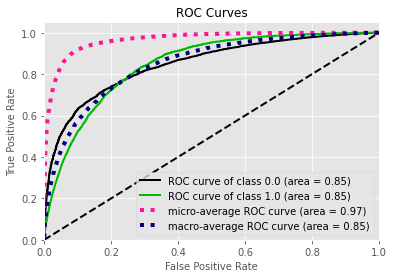

In [20]:
skplt.metrics.plot_roc_curve(y_test, y_pred_probs)
plt.show()

#### Note:  In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate for different cut-off points. True positive rate/Recall/Sensitivity (on y axes) equals to "TP/(TP+FN)". False positive rate/Specificity (on x axes) equals to "FP/(TN+FP)". For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis. A classifier with no power will sit on the diagonal, whilst most classifiers fall somewhere in between.

#### Examine model predictions using training data to assess overfitting (if any)

In [21]:
# Calculate predictions for the training data & build the confusion matrix and classification report
y_pred_train = model.predict(x_train)
confusion_matrix(y_train, y_pred_train)

array([[181630,   2103],
       [ 16740,   2471]], dtype=int64)

In [22]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    183733
         1.0       0.54      0.13      0.21     19211

    accuracy                           0.91    202944
   macro avg       0.73      0.56      0.58    202944
weighted avg       0.88      0.91      0.88    202944



In [ ]:
# There are no signs of overfitting, because the weighted avg precision, recall, and F1-score of training data prediction perform same as testing data prediction.

<BarContainer object of 52 artists>

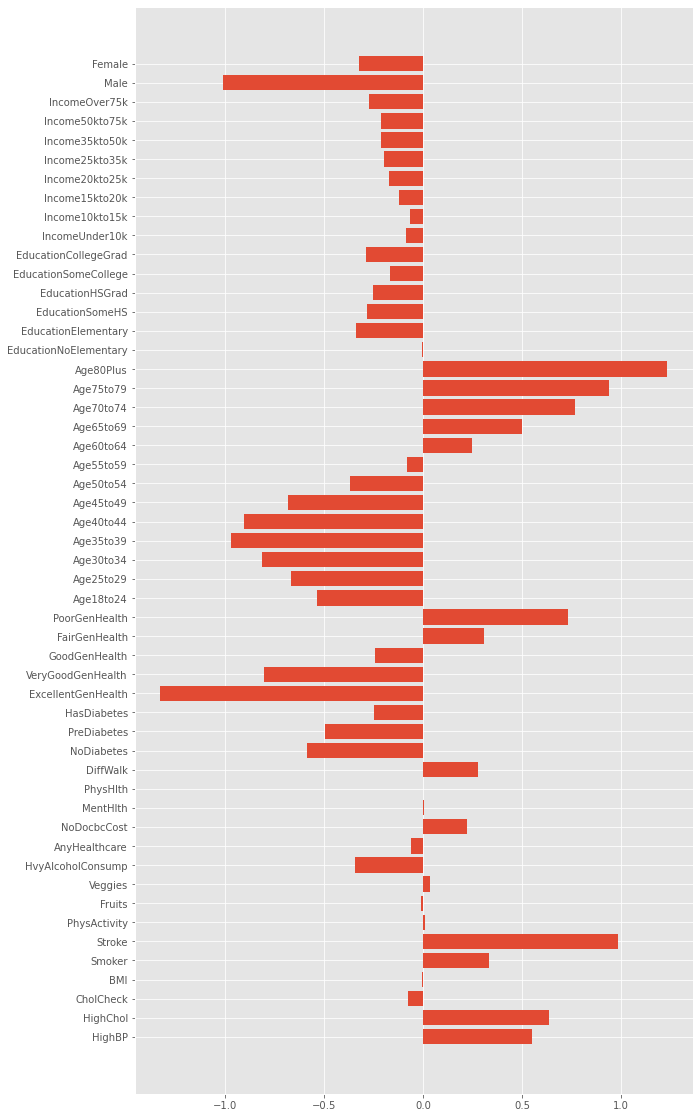

In [23]:
##Understanding attribute importance
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})

plt.figure(figsize=(10,20))
plt.barh(importances['Attribute'], importances['Importance'])

In [24]:
importances.sort_values(by="Importance")

,Attribute,Importance
18,ExcellentGenHealth,-1.326273
50,Male,-1.009055
26,Age35to39,-0.966717
27,Age40to44,-0.905305
25,Age30to34,-0.811554
19,VeryGoodGenHealth,-0.804618
28,Age45to49,-0.679374
24,Age25to29,-0.665035
15,NoDiabetes,-0.585102
23,Age18to24,-0.534475


#### LogisticRegression with PCA

In [59]:
# PCA with 2 components
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [60]:
x_train_pca2 = pca.fit_transform(x_train)
x_test_pca2 = pca.transform(x_test)

In [61]:
# b) Then use the transformed data (X_train_pca_2) to fit a Logistic Regression model.
LogReg_pca2 = model.fit(x_train_pca2, y_train)

In [62]:
# c) Calculate the confusion matrix and classification report for the test data
y_pred_pca2 = LogReg_pca2.predict(x_test_pca2)
confusion_matrix(y_test, y_pred_pca2)

array([[46052,     2],
       [ 4680,     2]], dtype=int64)

In [63]:
y_pred_probs_pca2 = model.predict_proba(x_test_pca2)

In [64]:
y_pred_probs_pca2

array([[0.93397514, 0.06602486],
       [0.90903974, 0.09096026],
       [0.89677155, 0.10322845],
       ...,
       [0.93853524, 0.06146476],
       [0.87361027, 0.12638973],
       [0.93647541, 0.06352459]])

In [65]:
#Brier score using predcited probabilities
from sklearn.metrics import brier_score_loss
# How good the model predicts for heart disease cases
y_pred_pca2 = y_pred_probs_pca2[:,1]
brier_score_loss(y_test, y_pred_pca2)

0.08158606453921578

In [66]:
#create class predictions based on model
y_pred2 = LogReg_pca2.predict(x_test_pca2)

In [67]:
#confusion matrix and Classification report
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[46052     2]
 [ 4680     2]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     46054
         1.0       0.50      0.00      0.00      4682

    accuracy                           0.91     50736
   macro avg       0.70      0.50      0.48     50736
weighted avg       0.87      0.91      0.86     50736

